In [23]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import load_breast_cancer
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster

In [24]:
breast = load_breast_cancer()
data = breast.data
target = breast.target
feature = breast.feature_names

In [25]:
df = pd.DataFrame(data, columns=feature)

In [26]:
df.head

<bound method NDFrame.head of      mean radius  mean texture  ...  worst symmetry  worst fractal dimension
0          17.99         10.38  ...          0.4601                  0.11890
1          20.57         17.77  ...          0.2750                  0.08902
2          19.69         21.25  ...          0.3613                  0.08758
3          11.42         20.38  ...          0.6638                  0.17300
4          20.29         14.34  ...          0.2364                  0.07678
..           ...           ...  ...             ...                      ...
564        21.56         22.39  ...          0.2060                  0.07115
565        20.13         28.25  ...          0.2572                  0.06637
566        16.60         28.08  ...          0.2218                  0.07820
567        20.60         29.33  ...          0.4087                  0.12400
568         7.76         24.54  ...          0.2871                  0.07039

[569 rows x 30 columns]>

In [27]:
df

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,1.1760,1.2560,7.673,158.70,0.010300,0.02891,0.05198,0.02454,0.01114,0.004239,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,0.7655,2.4630,5.203,99.04,0.005769,0.02423,0.03950,0.01678,0.01898,0.002498,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,0.4564,1.0750,3.425,48.55,0.005903,0.03731,0.04730,0.01557,0.01318,0.003892,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,0.7260,1.5950,5.772,86.22,0.006522,0.06158,0.07117,0.01664,0.02324,0.006185,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [28]:
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data)

In [29]:
linked = linkage(data_scaled, method='ward')

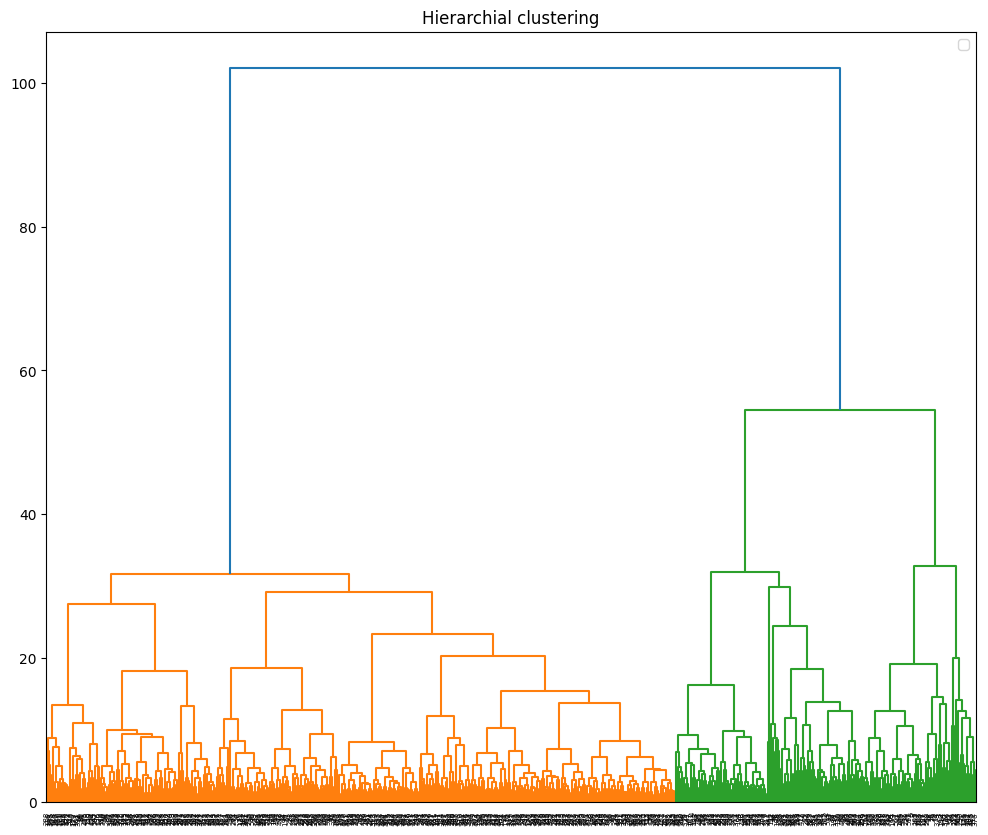

In [31]:
import warnings
warnings.filterwarnings(action='ignore')
plt.figure(figsize=(12,10))
dendrogram(linked, orientation='top', distance_sort='ascending', show_leaf_counts=True)
plt.title('Hierarchial clustering')
plt.legend()
plt.show()

In [32]:
max_clusters = 3
clusters = fcluster(linked, t=max_clusters, criterion='maxclust')


In [33]:
clusters

array([2, 2, 2, 3, 2, 3, 2, 3, 3, 3, 1, 1, 2, 1, 3, 3, 1, 3, 2, 1, 1, 1,
       3, 2, 2, 2, 3, 2, 3, 2, 2, 3, 2, 2, 1, 3, 1, 1, 1, 1, 1, 3, 2, 1,
       1, 2, 1, 3, 1, 1, 1, 1, 1, 2, 1, 1, 2, 1, 1, 1, 1, 1, 3, 1, 3, 3,
       1, 1, 3, 1, 2, 3, 2, 1, 1, 2, 1, 2, 2, 1, 1, 1, 2, 2, 1, 2, 1, 2,
       1, 3, 1, 1, 1, 1, 3, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 3, 1, 2, 1,
       1, 1, 3, 1, 1, 1, 1, 3, 3, 1, 1, 2, 2, 1, 1, 1, 1, 1, 3, 2, 1, 3,
       1, 1, 2, 1, 1, 1, 2, 1, 1, 2, 1, 1, 1, 1, 3, 1, 1, 1, 1, 3, 3, 1,
       1, 1, 2, 1, 1, 1, 1, 2, 2, 1, 2, 1, 1, 2, 2, 1, 1, 1, 3, 1, 1, 1,
       3, 3, 1, 1, 2, 2, 1, 1, 1, 1, 2, 1, 1, 1, 3, 1, 1, 3, 3, 1, 1, 1,
       2, 1, 1, 2, 2, 3, 1, 1, 1, 1, 1, 1, 2, 1, 2, 3, 3, 1, 1, 1, 2, 2,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 3, 1, 1, 2, 1, 1, 2, 2, 1, 2, 1, 1,
       3, 1, 2, 1, 1, 1, 1, 1, 2, 1, 2, 2, 2, 1, 2, 3, 2, 3, 2, 1, 2, 1,
       2, 2, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 3, 1, 1,
       1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2,

In [34]:
df['cluster'] = clusters


In [35]:
df.head

<bound method NDFrame.head of      mean radius  mean texture  ...  worst fractal dimension  cluster
0          17.99         10.38  ...                  0.11890        2
1          20.57         17.77  ...                  0.08902        2
2          19.69         21.25  ...                  0.08758        2
3          11.42         20.38  ...                  0.17300        3
4          20.29         14.34  ...                  0.07678        2
..           ...           ...  ...                      ...      ...
564        21.56         22.39  ...                  0.07115        2
565        20.13         28.25  ...                  0.06637        2
566        16.60         28.08  ...                  0.07820        2
567        20.60         29.33  ...                  0.12400        2
568         7.76         24.54  ...                  0.07039        1

[569 rows x 31 columns]>

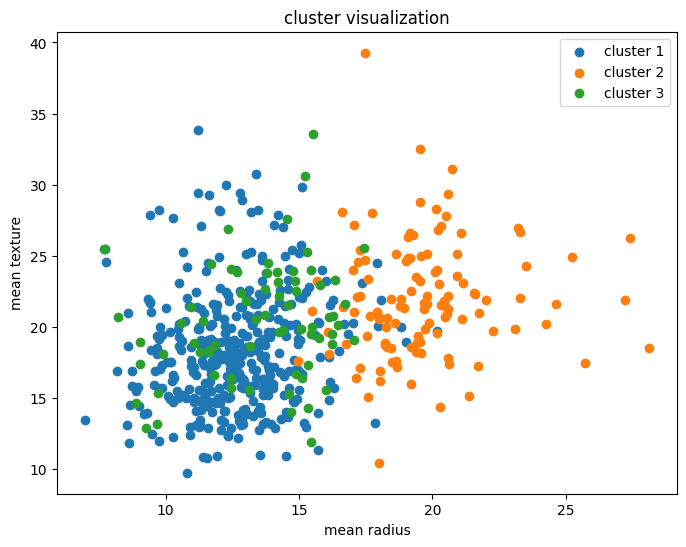

In [36]:
plt.figure(figsize=(8,6))
for cluster in range(1, max_clusters+1):
    cluster_data = data[clusters == cluster]
    plt.scatter(cluster_data[:, 0], cluster_data[:, 1], label = f"cluster {cluster}")
plt.title('cluster visualization')
plt.xlabel(feature[0])
plt.ylabel(feature[1])
plt.legend()
plt.show()